# Zillow Data Time Series Analysis

 - Emily Marsh
 - Self Paced
 - Scheduled Project Review Date/Time:
 - Instructor Name: Morgan Jones

# Introduction

In the United States, a common investment oppurtunity for personal and commercial investment is real estate. In 2023 the average the average annual return on investment for residential real estate in the United States is 10.6 percent. Commercial real estate averages a slightly lower ROI of 9.5 percent, while REITs average a slightly higher 11.8 percent. There have been recent historical events that have had an impact on this annual return on investment. The housing crash in 2011 as well as the COVID pandemic of 2020 have had outsized impacts on pricing of housing, however a consistent increase over time has made this an area of consistent profits. Compass Real Estate, an real estate brokerage company that specializes in high-margin, luxury homes in upscale markets, has commissioned this project to expand into a new lower cost housing market in order to appeal to a broader group of clients and quicker cash flow. 

## Business Objective

Compass Real Estate is interested in investing in lower priced housing, under $300,000, for a smaller but more consistent revenue stream to supplement their luxury housing investments. This will also give the company the chance to expand their client base to more middle class home buyers. However, before investing capitol in this new venture, Compass would like to do analysis into determining the best five zipcodes that provides the biggest chance of profit. Using the dataset, this analysis will provide insight into the five best zip codes for investment as well as the projected profits over the next five years in each zip code. These predictions will be made using Time Series modeling. 

## Dataset

The dataset used for this project is a subset of a larger dataset from Zillow, and consists of **14,732 rows** and **272 columns**. The format of the dataset includes features about **RegionID, Region Name (Zipcode), City, State, Metro, County Name, Size Rank**, and the **average price of houses in the zipcode starting in April of 1994 and ending with April of 2018**. Each **RegionName/Zipcode** is a unique value, while **Metro and County Name** are not. It is also important to note that the dataset is in a **wide format** versus a **long format**. Therefore in order to pass this data into a model, the dataset will need to be reshaped to a **long format**. 

## Import Libraries

In [1]:
#Importing necessary Packages

import warnings
import itertools
import numpy as np
import random
import pandas as pd
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
%matplotlib inline
import geopandas as gpd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler
from pandas import Series
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import ParameterGrid
import statsmodels.api as sm
import holidays
import pickle
from tqdm.notebook import tqdm
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam



import warnings
warnings.filterwarnings('ignore')

/Users/emilymarsh/anaconda3/envs/learn-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

## Initial Data Exploration

In [3]:
#using CSV reader to read dataframe into pandas

df = pd.read_csv('zillow_data.csv')

In [4]:
#initial overview of datasets columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [5]:
#exploring the total amount of columns and rows in dataset

df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [6]:
#observing values and format of the dataframe
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


## Data Understanding

Within this dataset, 4 of the features are string values, 49 are integers, and 219 are floats. As was mentioned earlier, this dataset is in a wide format instead of a long format. Long format will be necessary for passing the dataset into a model. Additional investigation will be necessary to determine if there are any null values in the dataset that could interfere with accurate results. 

## Check for Null Values

In [7]:
# checking for null values and returning it as a pandas series
empty=df.isna().sum()
empty.head(20)

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
dtype: int64

After additional investigation, the dataset appears to contain null values in the metro column and in some of the prices. Since the dataset that will be modeled will be a subset of this dataset, the prescence of null values will be checked again. 

# Data Preparation

 A dataset with 14723 rows would require substantial processing power to run through a model. Therefore in order to streamline the process, the dataset will be filtered using the client's budget and the zipcodes that show the greatest return on investment. In order to determine this, the profit of each zip code will be subtracted from the original price of the average property in April of 1996 from the average property value in April of 2018. Due to the client's budget, the available houses will be limited by price, only properties with a value of under $300,000 as of April 2018. Since Compass is a national company, geography is not a limiting factor for investment consideration therefore no geographical constraints will be used to limit the available zipcodes. 

## Filtering for Properties Under Client Budget

Since Compass Real Estate is interested in expanding into more middle class housing, the analysis will focus on properties that are under the price of $300,000 as of April 2018.

In [8]:
#creating new dataframe with only properties that are under $300,000 as of 2018-04
client_budget = df[df['2018-04']<=300000]

In [9]:
#Examining new dataframe size with budget restrictions
client_budget

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
11,71831,32162,The Villages,FL,The Villages,Sumter,12,101000.0,100700.0,100400.0,...,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
14,74101,37013,Nashville,TN,Nashville,Davidson,15,112400.0,112700.0,113000.0,...,193000,194900,196600,198800,201300,203800,205900,207600,210000,211900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14715,62556,12429,Esopus,NY,Kingston,Ulster,14716,78300.0,78300.0,78200.0,...,164200,166600,170000,171000,170700,171300,172400,173600,175800,177500
14717,62697,12720,Bethel,NY,NaN,Sullivan,14718,62500.0,62600.0,62700.0,...,122200,122700,122300,122000,122200,122800,123200,123200,120700,117700
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800


Even with the budget limit of $3000,000, Compass Real Estate has many zipcodes to potentially choose from. In order to determine which zipcodes have the greates ROI and limit the zipcodes being considered for modeling, a new column will be created to show the total increase in value from April of 1996 to April of 2018.

## Creating Total Price Increase Column to Dataframe

Since the client, Compass Real Estate, is interested in maximizing profits, a new column showing the total increase in price from April of 1996 to April of 2018 will be added to the dataset. As a result, a house that has gained the most dollar value compared to its intial price over this time will be the most desirable for the clients. 

In [10]:
#Creating a new column with April 2018 price minus the price in April of 1996 to show overall value increase over 
#the time period
client_budget.loc[:,'Total Price Increase'] = (
    client_budget['2018-04'] - client_budget['1996-04']
            )

In [11]:
#examining new Total Price Increase Column
client_budget

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Total Price Increase
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,44200.0
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,158700,160200,161900,162800,162800,162800,162900,163500,164300,69300.0
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,167400,168400,169600,170900,172300,173300,174200,175400,176200,80800.0
11,71831,32162,The Villages,FL,The Villages,Sumter,12,101000.0,100700.0,100400.0,...,250400,249900,248700,247500,247100,246800,247500,249800,251800,150800.0
14,74101,37013,Nashville,TN,Nashville,Davidson,15,112400.0,112700.0,113000.0,...,194900,196600,198800,201300,203800,205900,207600,210000,211900,99500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14715,62556,12429,Esopus,NY,Kingston,Ulster,14716,78300.0,78300.0,78200.0,...,166600,170000,171000,170700,171300,172400,173600,175800,177500,99200.0
14717,62697,12720,Bethel,NY,NaN,Sullivan,14718,62500.0,62600.0,62700.0,...,122700,122300,122000,122200,122800,123200,123200,120700,117700,55200.0
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,217700,218600,218500,218100,216400,213100,209800,209200,209300,114700.0
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,208400,212200,215200,214300,213100,213700,218300,222700,225800,133100.0


From the limited view of the available 10,632 rows, a range of profits over time are already evident. It will be necessary to order the data by these values to determine which zip codes have the greatest total value increase.  

## Ordering By Total Price Increase and Creating a Top 25 Zip Code Dataset

Since the client is limited by resources to only focus on five zipcodes and with limited processing power, the top 25 Zip Codes will be modeled to give options for selecting the top five zip codes that maximize profit and predicting future profits. 

In [12]:
#ordering the dataframe from highest value of Total Price Increase to find the top 25 zipcodes 
top_25_zips = client_budget.sort_values(by=['Total Price Increase'], ascending=False).head(25)

In [13]:
#examine new dataframe of top 25 zipcodes according to total price increase
top_25_zips

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Total Price Increase
13830,66102,19951,Harbeson,DE,Salisbury,Sussex,13831,34500.0,34900.0,35200.0,...,258600,258100,260300,265400,269300,272100,275300,277000,276900,242400.0
14217,93399,80449,Hartsel,CO,Denver,Park,14218,30000.0,30400.0,30900.0,...,244600,248000,251300,252900,254700,256600,259200,263400,267700,237700.0
3615,65792,19125,Philadelphia,PA,Philadelphia,Philadelphia,3616,32600.0,32700.0,32800.0,...,249000,251600,253900,255700,257100,258000,258500,260500,262300,229700.0
11353,95177,86334,Paulden,AZ,Prescott,Yavapai,11354,41100.0,41400.0,41700.0,...,229800,232000,237000,242800,249200,253900,257800,263900,269900,228800.0
2656,73011,34120,Naples,FL,Naples,Collier,2657,68600.0,67900.0,67200.0,...,289800,291800,293800,294000,293700,294600,294700,295100,296200,227600.0
8350,92632,78721,Austin,TX,Austin,Travis,8351,69200.0,68800.0,68400.0,...,281200,281500,284000,288500,293000,296300,297800,297200,296100,226900.0
3153,99192,97321,Albany,OR,Albany,Linn,3154,71600.0,71900.0,72200.0,...,286800,288600,289500,289700,290700,292100,293200,295200,297700,226100.0
13470,82893,56511,Audubon,MN,NaN,Becker,13471,59200.0,59300.0,59500.0,...,281000,280500,279100,277700,278100,279800,280100,281400,284300,225100.0
8743,99229,97370,Philomath,OR,Corvallis,Benton,8744,69300.0,69700.0,70000.0,...,278300,281300,284400,287100,290100,292900,293000,291800,291500,222200.0
10598,64752,16827,Boalsburg,PA,State College,Centre,10599,67500.0,67700.0,67900.0,...,274400,277000,278200,279000,279800,279700,280800,284300,287800,220300.0


In [14]:
empty_25=top_25_zips.isna().sum()
empty_25.head(40)

RegionID      0
RegionName    0
City          0
State         0
Metro         2
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
1998-03       0
1998-04       0
1998-05       0
1998-06       0
1998-07       0
1998-08       0
1998-09       0
1998-10       0
1998-11       0
1998-12       0
dtype: int64

After checking, the Top 25 Zip Codes dataset only contains two null values in the Metro column. This feature column is unimportant to the modeling process as this feature will be dropped in favor of using RegionName/Zipcode. 

## Visualizing the Geographic Spread of the Top 25 Zip Codes

Despite the client, Compass Real Estate, not being limited to geographic locations, there might be valuable insight by looking at geographic trends among the top 25 zipcodes for potential maximizing of resources. A dataset with latitute and longitude values for each Zipcode will be created in order to create a useful visual. 

In [15]:
#extracting the top 25 Zipcodes from the dataset
list(top_25_zips['RegionName'])

[19951,
 80449,
 19125,
 86334,
 34120,
 78721,
 97321,
 56511,
 97370,
 16827,
 16801,
 32233,
 86323,
 55409,
 56442,
 80456,
 33947,
 63108,
 56443,
 70734,
 37216,
 57110,
 19968,
 30316,
 33602]

In [16]:
#creating a list of values for the longitude and latitude of each Zipcode
coord = [(19951, 38.6898, -75.24000), (80449, 38.95689,-105.87044), (19125, 39.97641,-75.12217), (86334, 34.94867,-112.54443), 
        (34120, 26.32277,-81.55923),(78721, 30.26619,-97.68476), (97321, 44.63339,-123.13956), (56511, 46.84768,-96.01409), (97370, 44.59613,-123.45873), 
         (16827, 40.77297,-77.76024), (16801, 40.78681,-77.84438), (32233, 30.36143,-81.42642), (86323, 34.83896,-112.39677), (55409, 44.92652,-93.29081), (56442, 46.68866,-94.09915),
        (80456, 39.35346,-105.77032), (33947, 26.88093,-82.26993), (63108, 38.64461,-90.25198), (56443, 46.19521,-94.55463), (70734, 30.20703,-91.00902),
        (37216, 36.21681,-86.72443), (57110, 43.54969,-96.63113), (19968, 38.76454,-75.29784), (30316, 33.71759,-84.33225), (33602, 27.94946,-82.46118)]

In [17]:
#creating a dataframe with the longitude, latitude, and RegionName values
zip_long_lat = pd.DataFrame(coord, columns=['RegionName', 'Latitude', 'Longitude'])

In [18]:
#examining dataframe
zip_long_lat

,RegionName,Latitude,Longitude
0,19951,38.68980,-75.24000
1,80449,38.95689,-105.87044
2,19125,39.97641,-75.12217
3,86334,34.94867,-112.54443
4,34120,26.32277,-81.55923
5,78721,30.26619,-97.68476
6,97321,44.63339,-123.13956
7,56511,46.84768,-96.01409
8,97370,44.59613,-123.45873
9,16827,40.77297,-77.76024


In [19]:
#merging the latitude and longitude dataframe with the Top 25 Zipcode Dataframe
top_25_full_df = pd.merge(top_25_zips, zip_long_lat, on=["RegionName"])

In [20]:
#examining new full dataset
top_25_full_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Total Price Increase,Latitude,Longitude
0,66102,19951,Harbeson,DE,Salisbury,Sussex,13831,34500.0,34900.0,35200.0,...,260300,265400,269300,272100,275300,277000,276900,242400.0,38.68980,-75.24000
1,93399,80449,Hartsel,CO,Denver,Park,14218,30000.0,30400.0,30900.0,...,251300,252900,254700,256600,259200,263400,267700,237700.0,38.95689,-105.87044
2,65792,19125,Philadelphia,PA,Philadelphia,Philadelphia,3616,32600.0,32700.0,32800.0,...,253900,255700,257100,258000,258500,260500,262300,229700.0,39.97641,-75.12217
3,95177,86334,Paulden,AZ,Prescott,Yavapai,11354,41100.0,41400.0,41700.0,...,237000,242800,249200,253900,257800,263900,269900,228800.0,34.94867,-112.54443
4,73011,34120,Naples,FL,Naples,Collier,2657,68600.0,67900.0,67200.0,...,293800,294000,293700,294600,294700,295100,296200,227600.0,26.32277,-81.55923
5,92632,78721,Austin,TX,Austin,Travis,8351,69200.0,68800.0,68400.0,...,284000,288500,293000,296300,297800,297200,296100,226900.0,30.26619,-97.68476
6,99192,97321,Albany,OR,Albany,Linn,3154,71600.0,71900.0,72200.0,...,289500,289700,290700,292100,293200,295200,297700,226100.0,44.63339,-123.13956
7,82893,56511,Audubon,MN,NaN,Becker,13471,59200.0,59300.0,59500.0,...,279100,277700,278100,279800,280100,281400,284300,225100.0,46.84768,-96.01409
8,99229,97370,Philomath,OR,Corvallis,Benton,8744,69300.0,69700.0,70000.0,...,284400,287100,290100,292900,293000,291800,291500,222200.0,44.59613,-123.45873
9,64752,16827,Boalsburg,PA,State College,Centre,10599,67500.0,67700.0,67900.0,...,278200,279000,279800,279700,280800,284300,287800,220300.0,40.77297,-77.76024


In [21]:
#Importing shp of the USA map for visualization
mapdf = top_25_full_df.copy()

usa_map = gpd.read_file('tl_2017_us_state/tl_2017_us_state.shp')
usa_map = usa_map.to_crs("EPSG:4326")

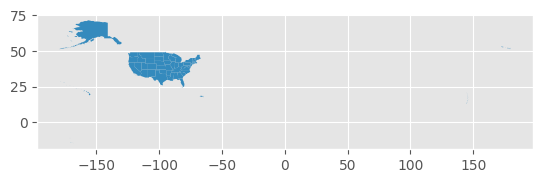

In [22]:
#examining SHP file
usa_map.plot();

In [23]:
#Removing Non Continental States from Visualization
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = usa_map
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

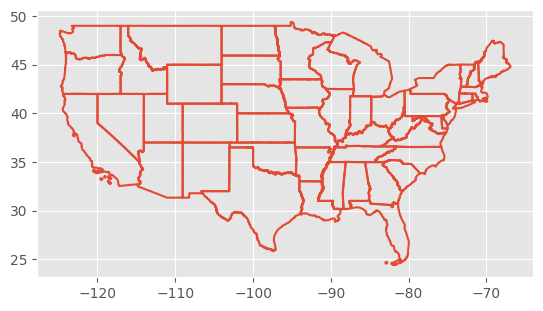

In [24]:
#examining new chart
us49.boundary.plot()
plt.show()

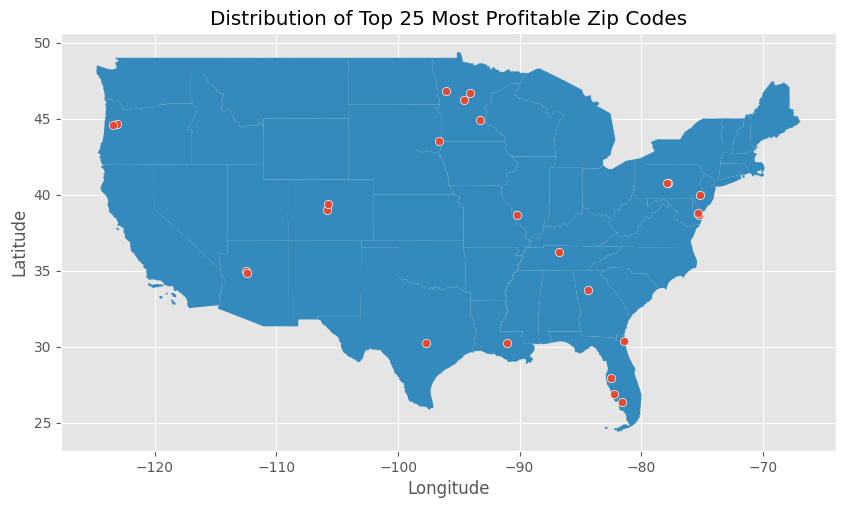

In [25]:
#Plotting the Top 25 Zip Codes on USA Chart
crs = {'init':'EPSG:4326'} #define CRS
geometry = [Point(xy) for xy in zip(mapdf['Longitude'], top_25_full_df['Latitude'])] #create Points
geo_df = gpd.GeoDataFrame(mapdf, 
                          crs = crs, 
                          geometry = geometry) #define the geometry df

#plot the data
fig, ax = plt.subplots(figsize = (10,10))
us49.to_crs(epsg=4326).plot(ax=ax)
sns.scatterplot(x="Longitude", y="Latitude",data=mapdf, ax=ax)
ax.set_title('Distribution of Top 25 Most Profitable Zip Codes')
plt.savefig("Top25.jpg");

As can be seen on the chart, there are some interesting geographic concentrations that could be of interest to the clients if there was a desire to consolidate resources geographically. The analysis of this project, however, will move forward with recommendations based solely on ROI considerations with no geographic consideration. 

## Visualizing the Price history of filtered Zip Codes since 1996

An important aspect of times series data series modeling is confirming that the time series on which the model is built is not affected by seasonality or trends within the data. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary through the use of mathematical transforations. Therefore the prescence of seasonality and trends negatively affect the performance of the models built using these methods. To get a better sense of whether there are any trends or seasonality in the dataset, a visualization of the average prices over the time period of the dataset will be utilized.

In [26]:
#creating a function to convert the dataset from wide format to long format
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby(['time']).aggregate({'value':'mean'})

In [27]:
#drop extra columns not needed for modeling
top_25_modeling_df = top_25_full_df.drop(['Total Price Increase', 'Latitude', 'Longitude'], axis=1)

In [28]:
#examine new dataset with dropped columns for modeling
top_25_modeling_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,66102,19951,Harbeson,DE,Salisbury,Sussex,13831,34500.0,34900.0,35200.0,...,260000,258600,258100,260300,265400,269300,272100,275300,277000,276900
1,93399,80449,Hartsel,CO,Denver,Park,14218,30000.0,30400.0,30900.0,...,243200,244600,248000,251300,252900,254700,256600,259200,263400,267700
2,65792,19125,Philadelphia,PA,Philadelphia,Philadelphia,3616,32600.0,32700.0,32800.0,...,247500,249000,251600,253900,255700,257100,258000,258500,260500,262300
3,95177,86334,Paulden,AZ,Prescott,Yavapai,11354,41100.0,41400.0,41700.0,...,230300,229800,232000,237000,242800,249200,253900,257800,263900,269900
4,73011,34120,Naples,FL,Naples,Collier,2657,68600.0,67900.0,67200.0,...,288300,289800,291800,293800,294000,293700,294600,294700,295100,296200


In [ ]:
#creating plot of prices changes by zipcode since 1996
zip_dict = {}

for zipcode in top_25_modeling_df['RegionName']:
    zip_dict[zipcode] = melt_data(top_25_modeling_df[top_25_modeling_df['RegionName']==zipcode])

fig,ax = plt.subplots(figsize=(20,12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode],)

ax.axhline(y=300000,label = 'Client Budget')   

ax.set_title('ZipCode Price Changes since 1996',fontsize=30)
ax.set_ylabel('Price in US $',fontsize=20)
ax.set_xlabel('Year',fontsize=20)
ax.legend(prop={'size': 25});

As can be seen in the visualization, there is an overall positive linear shape to the dataset. However there appear to be irregularities. Starting in 2004, some of the property prices experienced a sharp increase followed by a steep decline around 2008 till 2012. This corresponds with the 2008 financial housing crisis and recession. Since then, it appears that prices have been steadily on the rise since 2012 but have yet to reach their pre-recession peaks. There are also some outliers in the data that grew and declined more rapidly around 2008.

## Visualizing the The Zip Codes' Average Price Growth

Due to the limited amount of processing power, one zipcode will be selected from the top 25 zipcodes to build, evaluate, and help select a final model for prediction and selection. In order to select this zipcode, the top 25 zipcodes will be ordered by return on initial investment in order to select that zipcode that provided the greatest ROI. 

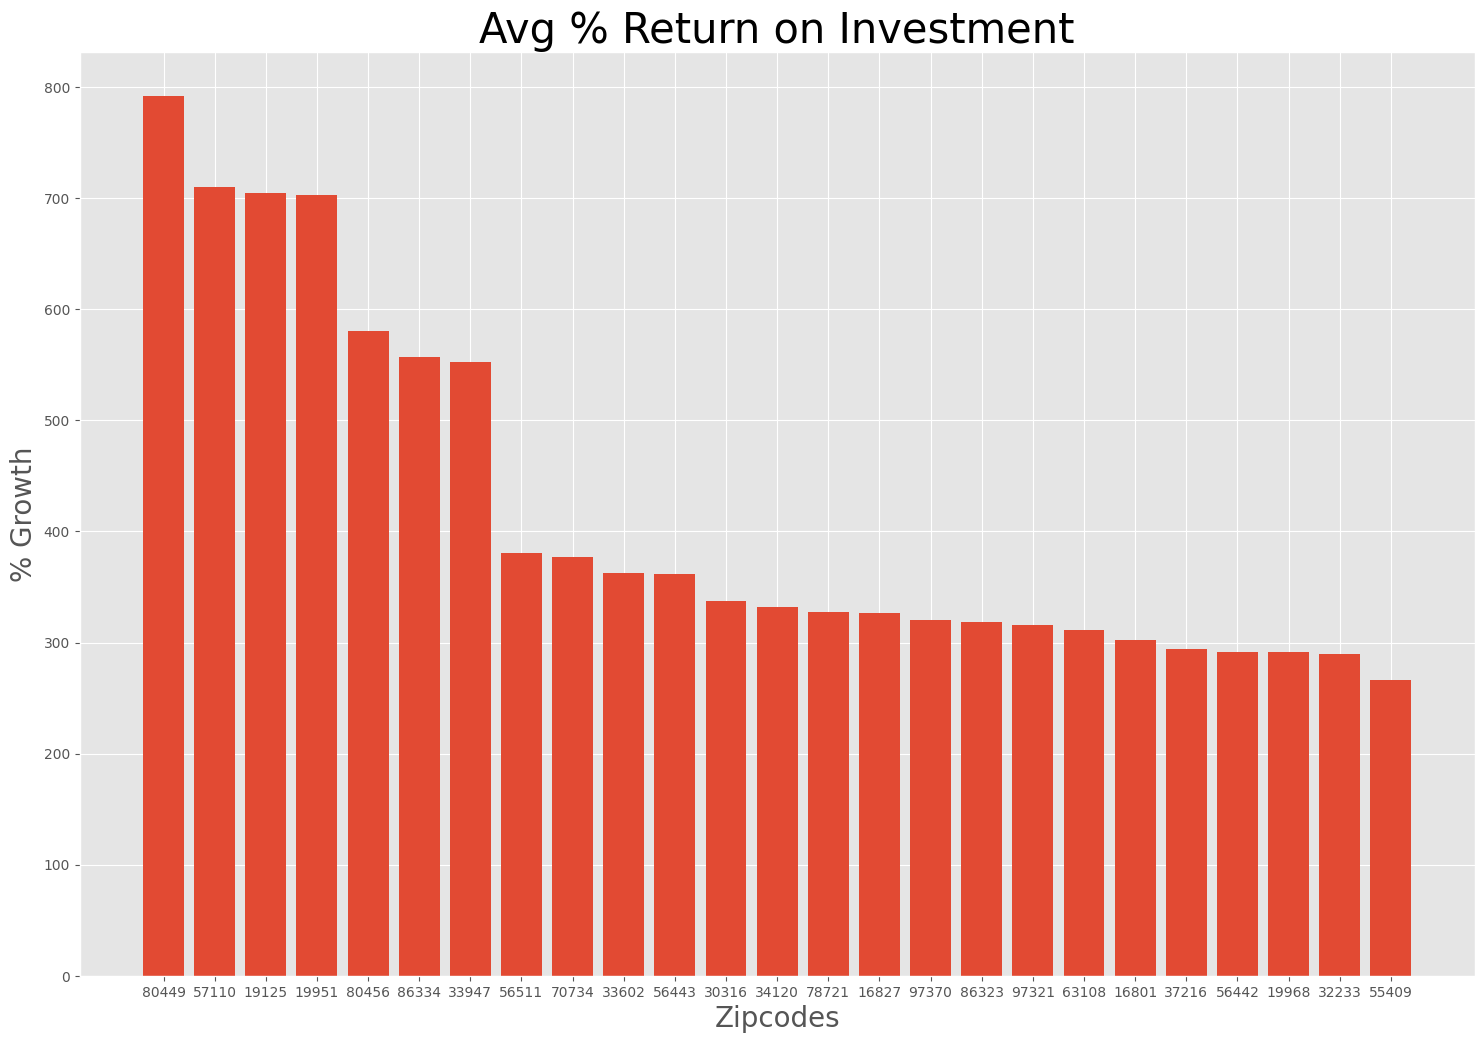

In [30]:
#creating a bar graph visual that shows the average return on investment for each of the top 25 zipcodes
warnings.filterwarnings('ignore')

#creating column with ROI
top_25_av_roi = top_25_modeling_df
top_25_av_roi['roi_since1996'] = (
    (top_25_av_roi['2018-04']-top_25_av_roi['1996-04'])/(top_25_av_roi['1996-04'])*100)
top_25_av_roi = top_25_av_roi.sort_values('roi_since1996',ascending=False)

warnings.filterwarnings('ignore')

#plotting column roi_since11 for each zipcode
fig,ax=plt.subplots(figsize=(18,12))

x_labels = [str(a) for a in top_25_av_roi['RegionName']]
x = list(range(1,26))
y = [a for a in top_25_av_roi['roi_since1996']]

ax.bar(x,y)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylabel('% Growth',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on Investment',fontsize='30');

We can see from above that the largest average return on investment was in zip code 80449. It is also of interest to note that within the top six zipcodes, there seem to be some concentration around the same geographic area. Areas of growth not being limited to one zipcode is an interesting oppurtunity for clients to acheive the highest ROI while also concentrating resources. It is also an oppurtunity to gain domain knowledge about features that may be impacting this growth. 

# Selecting a ZipCode for the Initial Time Series Model

In order to build a time series model that predicts the future ROI of each of the top 25 zipcodes within the client's budget and minimizes processing time, several initial time series models will be built on one of the zipcodes in the dataset. Since zipcode 80449 is the fastest growing, it will be used to construct the time series models for evaluation. Once the final model is selected, a similar workflow can then be utilized on the other zipcodes within the dataset to identify which five zipcodes have the highest predicted ROI. 

In [31]:
#dataframe containing zipcode 80449
zip80449 = df[df['RegionName']==80449]

In [32]:
#melting zipcode 80449 from wide to long format
series80449 = melt_data(zip80449)

In [33]:
#examining 80449 long format dataset
series80449

,value
time,
1996-04-01,30000.0
1996-05-01,30400.0
1996-06-01,30900.0
1996-07-01,31400.0
1996-08-01,31800.0
...,...
2017-12-01,254700.0
2018-01-01,256600.0
2018-02-01,259200.0


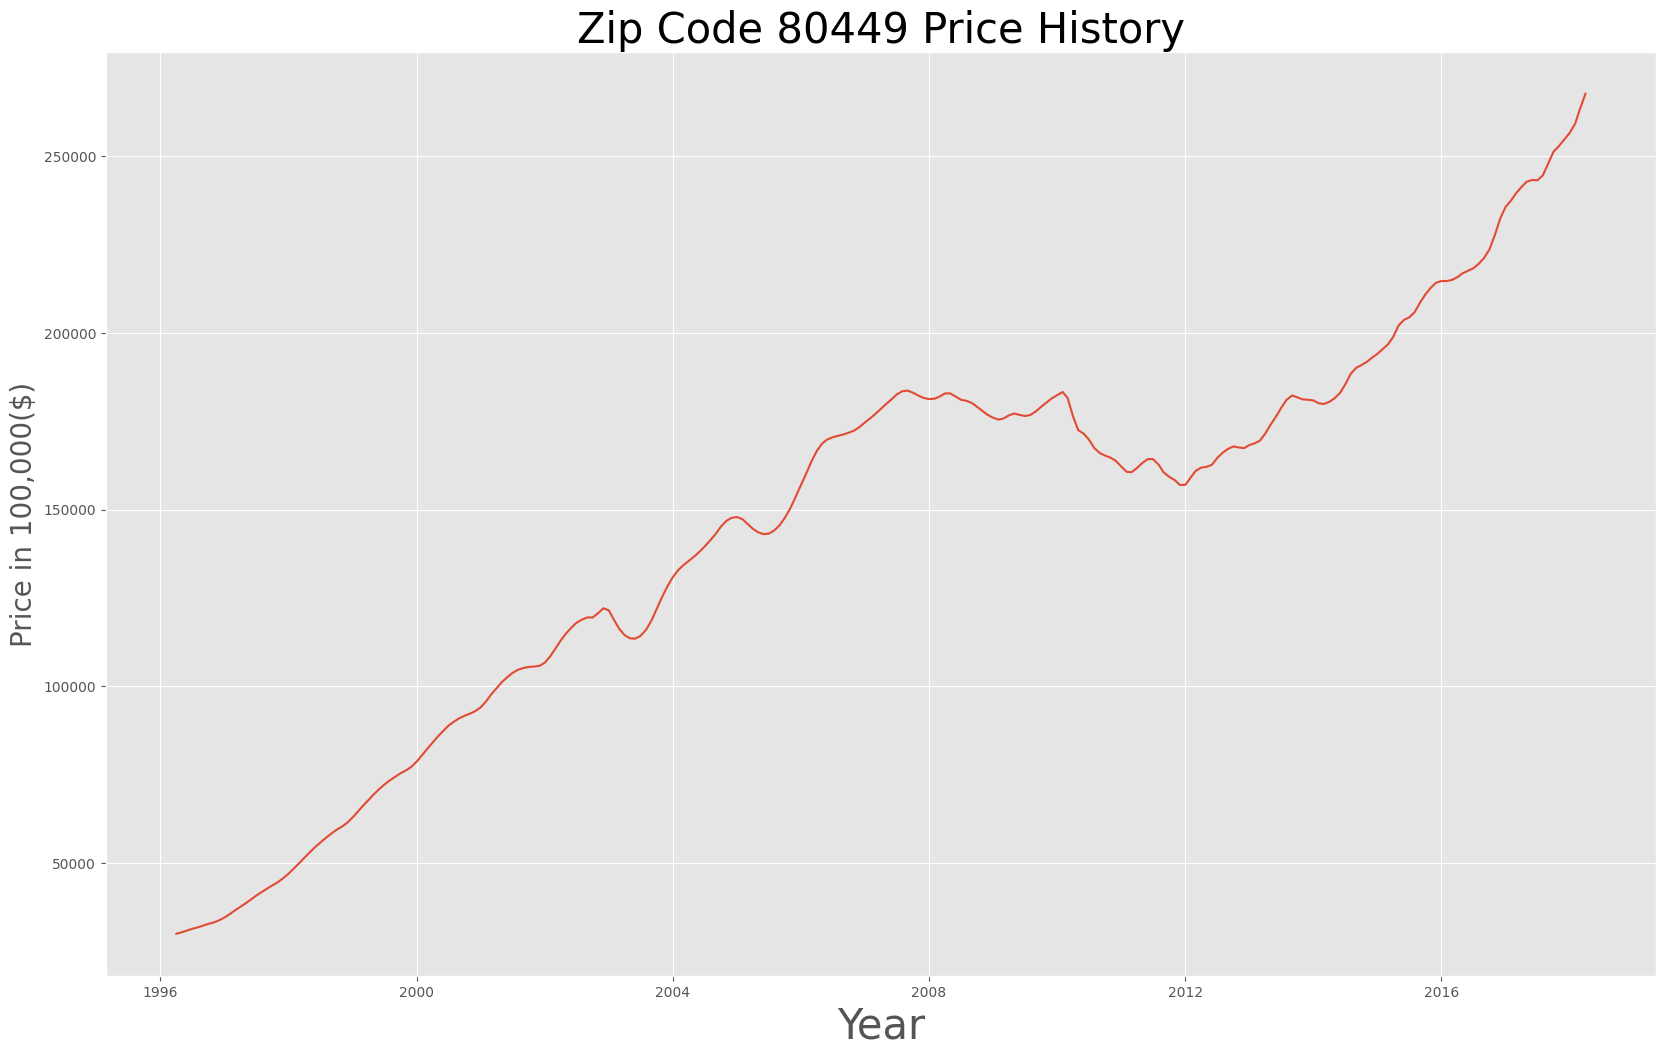

In [34]:
#Visualizing the Time Series Data for zipcode- 80449

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(series80449)

ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Price in 100,000($)',fontsize=20)
ax.set_title('Zip Code 80449 Price History',fontsize=30);

After having examined the price history of all the zipcodes in the top 25 dataset, individually the zipcode of 80449 follows a similar pattern. There is a sharp increase in price around 2004 followed by a small descent around the year 2008, and then continuing a steady increase starting in 2012. As a result, it seems reasonable to expect that a time series model of this individual zipcode will also be successful with the remaining zipcodes in the dataset. 

# Checking for Trends, Stationarity & Seasonality

As was mentioned earlier, most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary through the use of mathematical transformations. Three mathematical transformations will be utilized to make the time series stationary. These are differencing, logging, and squaring the data. In order to determine which of the mathmatical transformations are the most successful, a Dickey Fuller Test will be used. 

## Stationarity of Initial 80449 Data Series

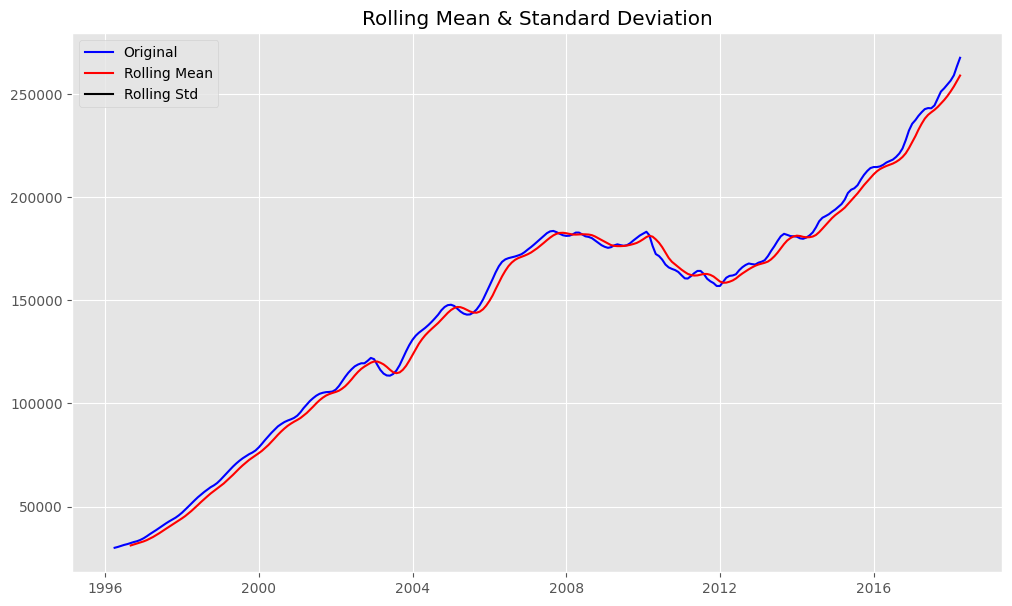

In [35]:
#examining the Rolling Mean & Standard Deviation of 80449
rolmean = series80449.rolling(window = 6, center = False).mean()
rolstd = series80449.rolling(window = 1, center = False).std()

fig = plt.figure(figsize=(12,7))
orig = plt.plot(series80449, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [36]:
#Dickey Fuller Test on inital 80449 time series dataset
p_val_orig = adfuller(series80449[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val_orig},")
if p_val_orig < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.9503415459897888,
 so we cannot reject the null hypothesis that the differenced data is not stationary.


As is showing in the visualization and the results of the Dickey Fuller test, the initial 80449 zipcode data series not stationary. Therefore mathematical transformations will be necessary to prepare the 80449 Data Series for modeling. 

## Differencing the 80449 Data Series for Stationarity

Differencing is one of the most common ways of trying to convert a non-stationary series into a stationary series. This is acheived by subtracting the current value of the series from the previous one, or from a lagged value.

In [37]:
#Differencing the 80449 Data Series
data_diff = series80449.diff(periods=1)
data_diff.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,400.0
1996-06-01,500.0
1996-07-01,500.0
1996-08-01,400.0
1996-09-01,500.0
1996-10-01,500.0
1996-11-01,400.0
1996-12-01,600.0


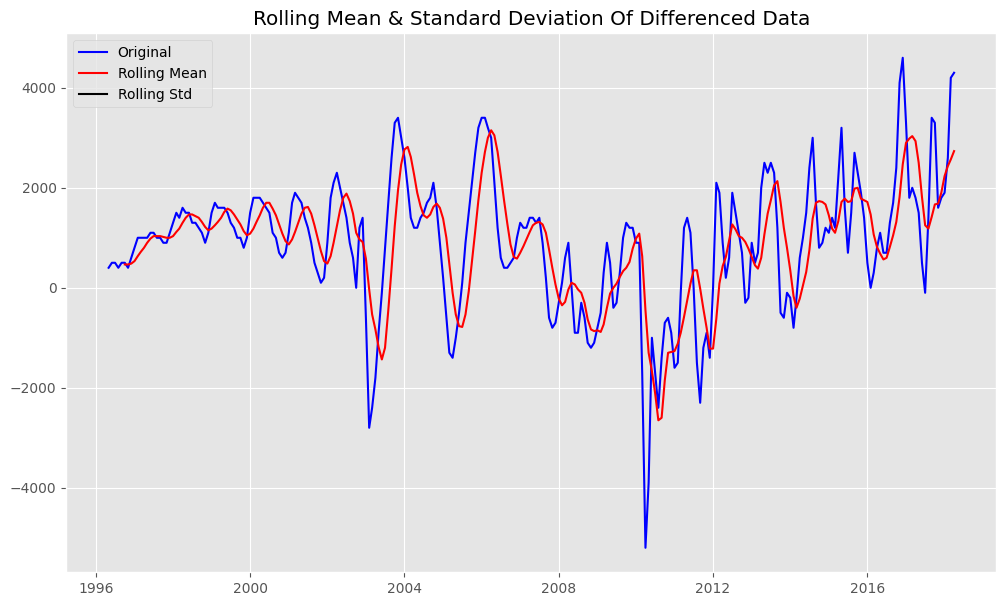

In [38]:
#examining the Rolling Mean and STD of the differenced 80449 data series
rolmean = data_diff.rolling(window = 6, center = False).mean()
rolstd = data_diff.rolling(window = 1, center = False).std()

fig = plt.figure(figsize=(12,7))
orig = plt.plot(data_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Of Differenced Data')
plt.show(block=False)

In [39]:
p_val_diff_1 = adfuller(data_diff[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val_diff_1},")
if p_val_diff_1 < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.30144200668853427,
 so we cannot reject the null hypothesis that the differenced data is not stationary.


The visualization shows there has been a decrease in the trends within the time series of zipcode 80449, however the p-value associated with the Dickey Fuller test is not small enough to reject the null hypothesis. In order to explore if differencing on different periods would make a difference in the p-value, a for loop is used to explore differencing periods from 0 to 25. 

In [41]:
#Exploring the p-value of shifted periods for calculating difference
def find_best_difference(data):
    for i in range(0,25):
        difference = data.diff(periods=i)
        dftest = adfuller(difference[i:])
        print(i,dftest[1])

find_best_difference(series80449)

ValueError: Invalid input, x is constant

None of the different periods have resulted in a p-value under .05 which is needed to reject the null hypothesis. Another mathematical transformation will be implemented on the data series to try and acheive stationarity. 

## Log Transforming the 80449 Data Series for Stationarity

Log transformation can be used to stabilize the variance of a series with non-constant variance. This penalizes higher values and thus reduces variance. One limitation of log transformation is that it can be applied only to positively valued time series. Since this data series has only positive values, log transformation can be used. 

In [43]:
#Transforming the 80449 data series using log transforming
data_log = np.log(series80449)
data_log.head(10)

,value
time,
1996-04-01,10.308953
1996-05-01,10.322198
1996-06-01,10.338511
1996-07-01,10.354563
1996-08-01,10.367222
1996-09-01,10.382823
1996-10-01,10.398184
1996-11-01,10.410305
1996-12-01,10.428216


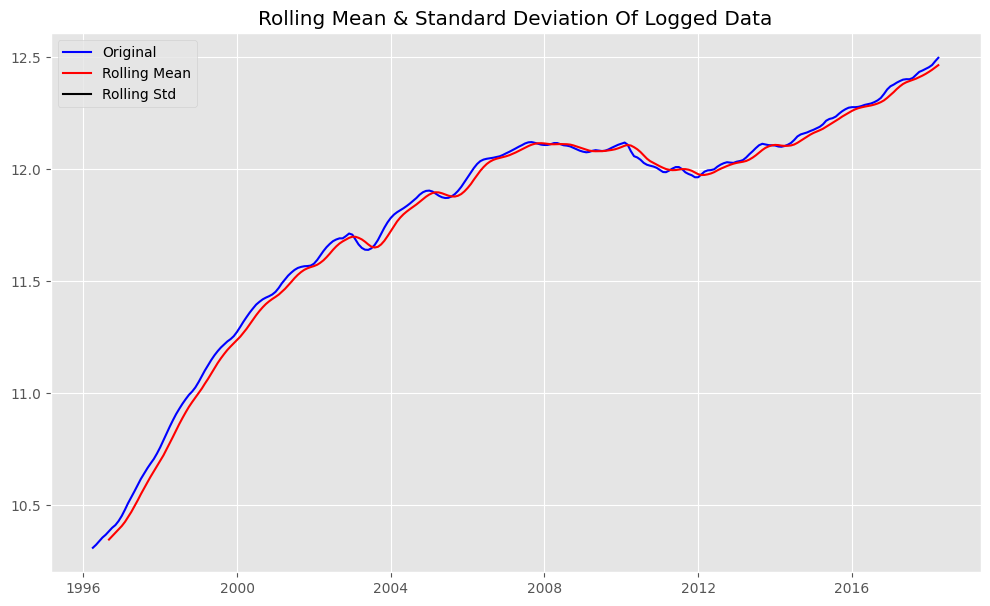

In [44]:
#Examining the rolling mean and std of the log transformed data series
rolmean = data_log.rolling(window = 6, center = False).mean()
rolstd = data_log.rolling(window = 1, center = False).std()

fig = plt.figure(figsize=(12,7))
orig = plt.plot(data_log, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Of Logged Data')
plt.show(block=False)

In [45]:
p_val_log_1 = adfuller(data_log[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val_log_1},")
if p_val_log_1 < 0.05:
    print(" so we can safely assume that the logged data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.023716061959594595,
 so we can safely assume that the logged data is stationary.


The p-value associated with the Dickey Fuller test is lower then the .05 confidence interval, therefore using the log transformation the data series is now stationary. The visualization also confirms this conclusion since the range of the price values has been greatly reduced, reducing the data series to white noise. Similarly with differencing the data, a for loop will be used to determine if a different period will lead to a better p-value. 

In [46]:
#Checking period difference for the log transformation
find_best_difference(data_log)

ValueError: Invalid input, x is constant

None of the iterations of periods decreased the p-value, therefore the original log transformation will be used. So far this mathmatical transformation was the most successful at making the 80499 data series stationary. There is one additional mathematical transformation that will be explored, taking the square root of the data series. 

## Square Root Transforming the 80449 Data Series for Stationarity

Similar to log transformatino, the square root transformation penalizes large numbers and reduces the range of the values in the data series. Since log transformation was successful in creating a stationary data series it seems valuable to explore this similar method of transformation as well. 

In [47]:
#Transforming the 80449 data series by taking the square root of the data
data_sqrt = np.sqrt(series80449)
data_sqrt.head(10)

,value
time,
1996-04-01,173.205081
1996-05-01,174.355958
1996-06-01,175.783958
1996-07-01,177.200451
1996-08-01,178.325545
1996-09-01,179.722008
1996-10-01,181.107703
1996-11-01,182.208672
1996-12-01,183.847763


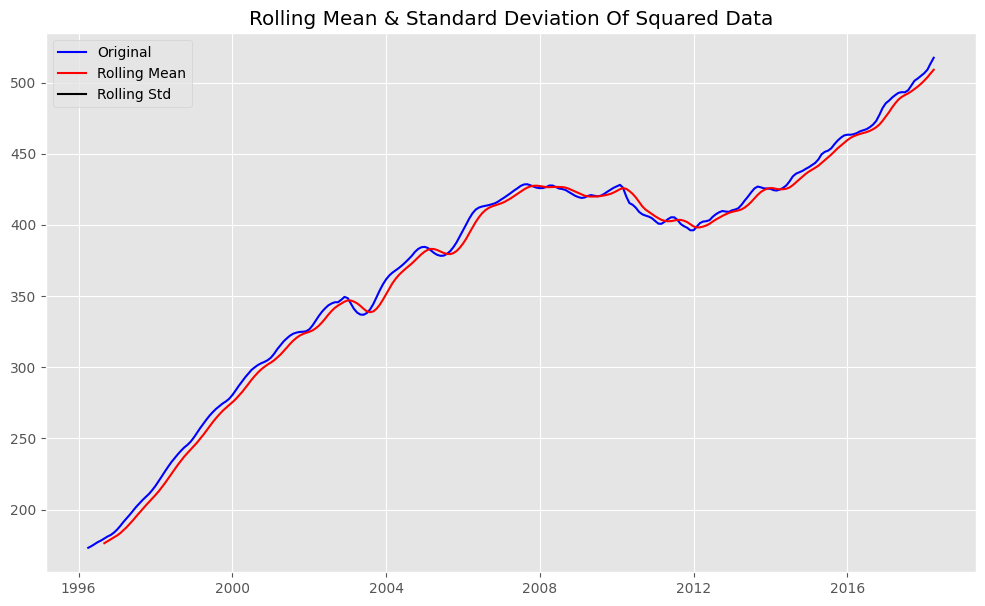

In [48]:
#Examining the rolling mean and std of the squared data series
sqrtmean = data_sqrt.rolling(window = 6, center = False).mean()
sqrtstd = data_sqrt.rolling(window = 1, center = False).std()

fig = plt.figure(figsize=(12,7))
orig = plt.plot(data_sqrt, color='blue',label='Original')
mean = plt.plot(sqrtmean, color='red', label='Rolling Mean')
std = plt.plot(sqrtstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Of Squared Data')
plt.show(block=False)

In [49]:
p_val_sqrt = adfuller(pd.Series(np.sqrt(series80449['value']), index=series80449.index))[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val_sqrt},")
if p_val_sqrt < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.4580834309494604,
 so we cannot reject the null hypothesis that the differenced data is not stationary.


Unlike the log transformation, taking the square root of the data series was not successful at eliminating trends within the data series. Similar to before, additional periods will be explored to determine if stationarity can be acheived. 

In [50]:
#Checking period difference for the log transformation
find_best_difference(data_sqrt)

ValueError: Invalid input, x is constant

It does seem that when the period is one the p-value associated with the Dickey Fuller test is below the .05 confidence interval. This could potentially be used as a transformation to prepare the data series for modeling. 

## Picking A Mathematical Transformation for Stationarity

Based on the p-value associated with the Dickey Fuller Test, the mathematical transformation that was successful at transforming the data series into a stationary one was logging the data series and taking the square root of the data series in one period. For ease of transformation, logging the data series will be used to make the data series stationary for model building, fitting, and evaluating. 

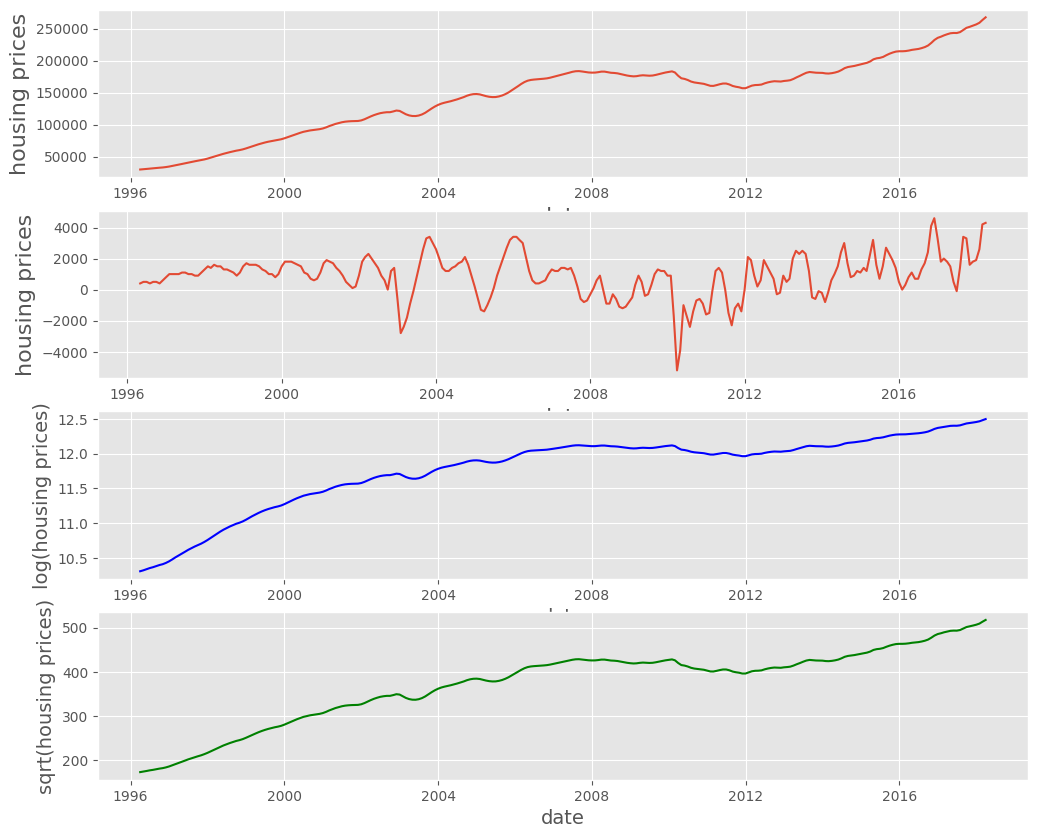

In [51]:
#Visualizations for  Original Data Series and Three Mathematical Transformations
fig = plt.figure(figsize=(12,10))

# No transformation
plt.subplot(4, 1, 1)
plt.plot(series80449)
plt.xlabel("date", fontsize=16)
plt.ylabel("housing prices", fontsize=16)

#Differencing
plt.subplot(4, 1, 2)
plt.plot(data_diff)
plt.xlabel('data', fontsize=16)
plt.ylabel("housing prices", fontsize=16)

# Log transformation (linear and heteroscedastic)
plt.subplot(4, 1, 3)
plt.plot(pd.Series(np.log(series80449['value']), index=series80449.index), color="blue")
plt.xlabel("date", fontsize=14)
plt.ylabel("log(housing prices)", fontsize=14)

# Square root transformation 
plt.subplot(4, 1, 4)
plt.plot(pd.Series(np.sqrt(series80449['value']), index=series80449.index), color="green")
plt.xlabel("date", fontsize=14)
plt.ylabel("sqrt(housing prices)", fontsize=14)


plt.show()

## Seasonal Decomposition

In the 80449 dataset, there is more of a trend then seasonality. Seasonality would be patterns within the year cycle and visually the data seems to be mostly following a positive linear trend. However, for exploration, decomposition will be explored as a way to mitigate seasonality within the dataset. 

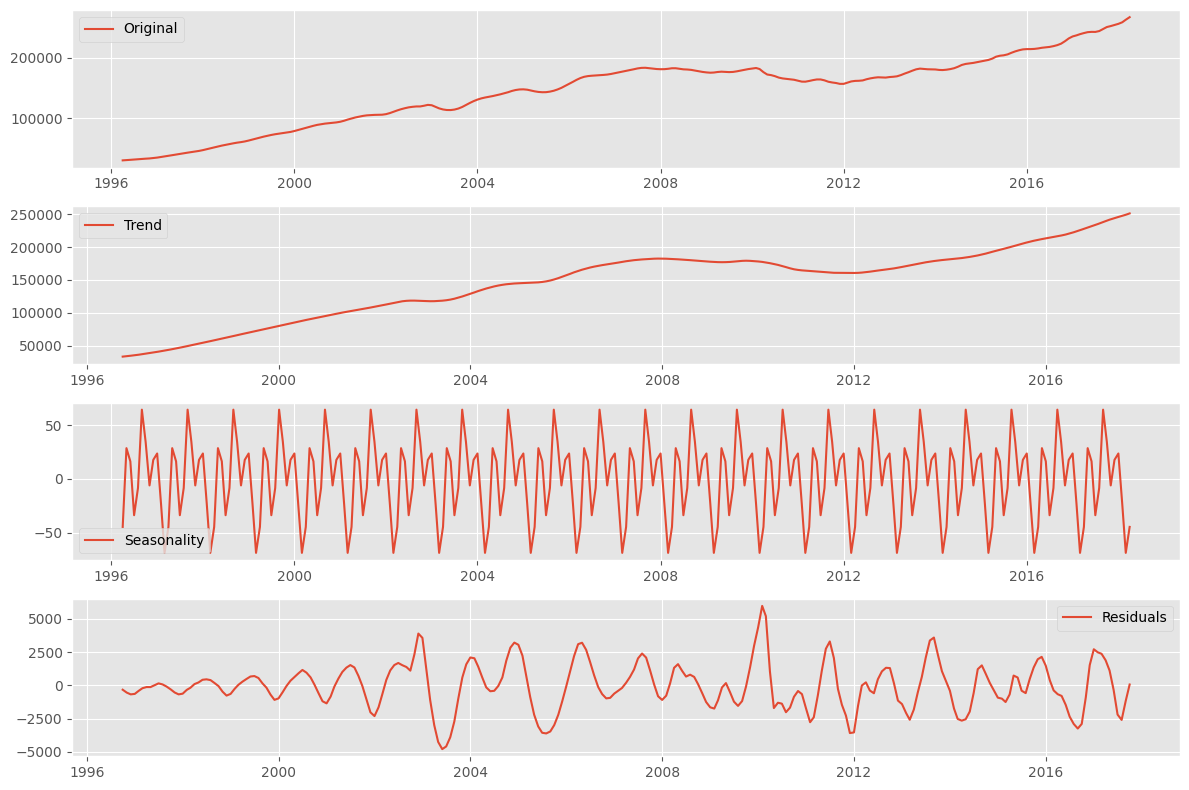

In [52]:
# Import and apply seasonal_decompose()
decomposition = seasonal_decompose(series80449)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(series80449, label='Original')#np.log(ts)
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

In these visualizations the trend and seasonality have been seperated from the data and the residuals can be modeled. By using the time series decomposition, it makes it easier to quickly identify changing mean or variation. The plot above shows the upward trend of the data series. 

In [53]:
# Drop missing values from residuals 
series80449_residuals = residual
series80449_residuals.dropna(inplace=True)

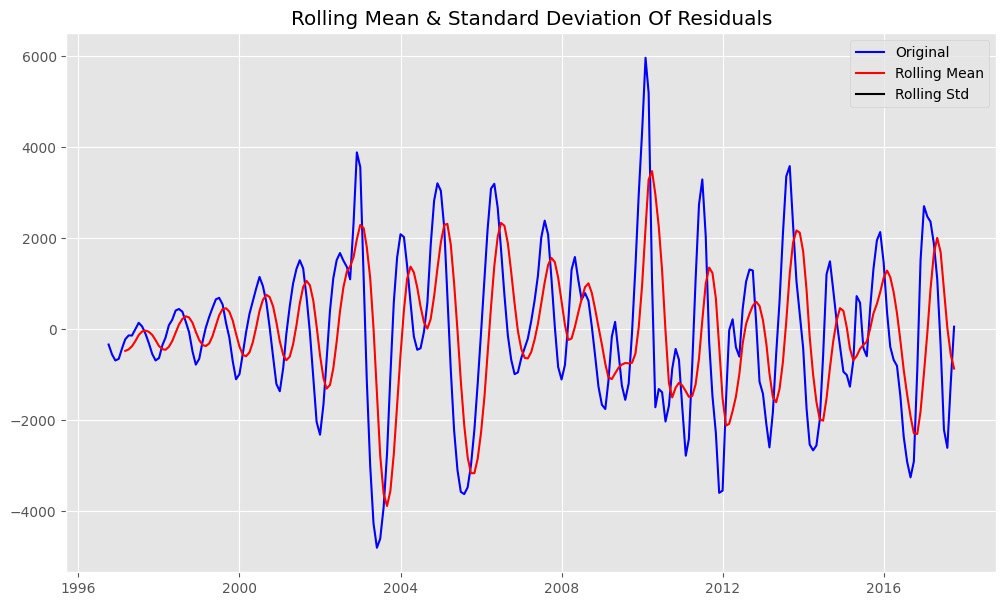

In [54]:
#Visualization of the Residuals of the 80449 data series
rolmean = series80449_residuals.rolling(window = 6, center = False).mean()
rolstd = series80449_residuals.rolling(window = 1, center = False).std()

fig = plt.figure(figsize=(12,7))
orig = plt.plot(series80449_residuals, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Of Residuals')
plt.show(block=False)

In [55]:
p_val_resid = adfuller(series80449_residuals[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val_resid},")
if p_val_resid < 0.05:
    print(" so we can safely assume that the residual data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the residual data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 1.3053244075273174e-07,
 so we can safely assume that the residual data is stationary.


The Dickey-Fuller test statistic is significant and very well below the the .05 mark. Therefore it seems reasonable to assume this time series is stationary.

# ACF and PACF Plots

As a last step before beginning on model building exploration of the ACF and PACF plots of both the Original Data Series, the Log Transformation, and the Residuals. The autocorrelation analysis helps detect patterns and check for randomness. It is also helpful for determining the model order for p for AR and Q for MA to select the best model for forecasting. 

## Original Data Series ACF & PACF Plots

A precondition of ACT and PACF is staionarity. Since it has already been establish that the 80449 data series is not stationary the information that can gained from the ACF and PACF plots is limited. 

<Figure size 1200x500 with 0 Axes>

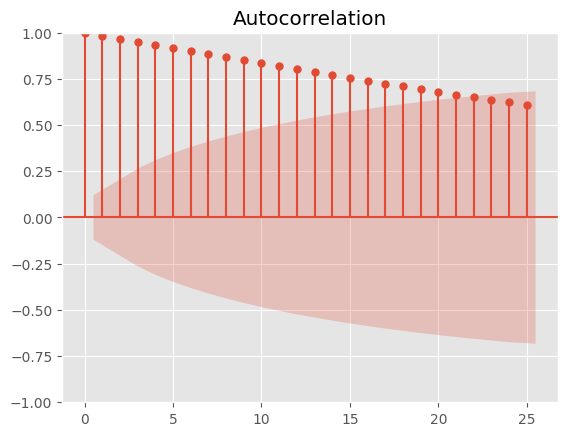

In [56]:
#ACF plot of original 80449 series
plt.figure(figsize=(12,5))
plot_acf(series80449);

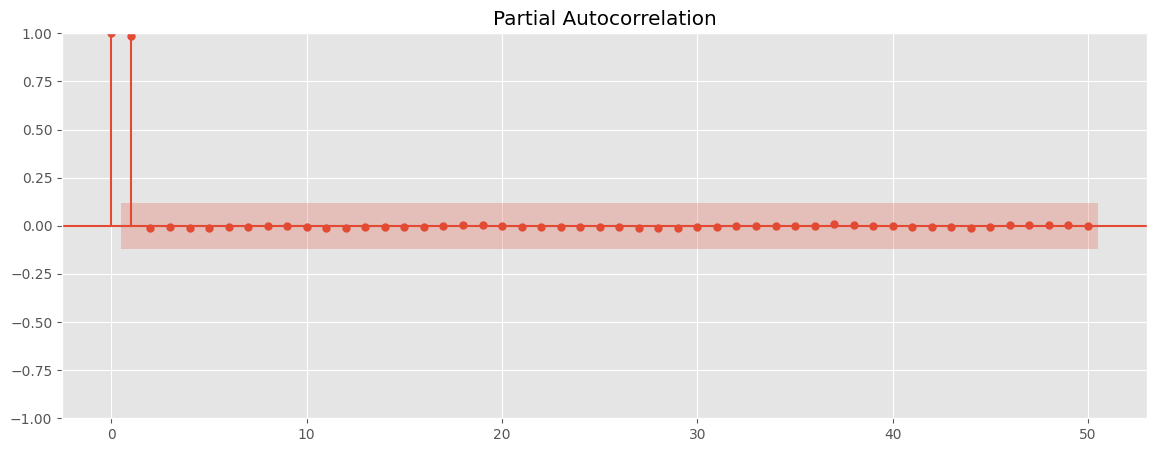

In [57]:
#PACF plot of original 80449 series
rcParams['figure.figsize'] = 14, 5

plot_pacf(series80449, lags=50);

For the ACF plot there is a tail off pattern and there are several autocorrelations that are significantly non zero. Therefore the time series is non random. The PACF plot shows geometric decay. However, as was previously mentioned, the original 80449 data series is not stationary. 

## Logged Data Series ACF & PACF Plots

<Figure size 1200x500 with 0 Axes>

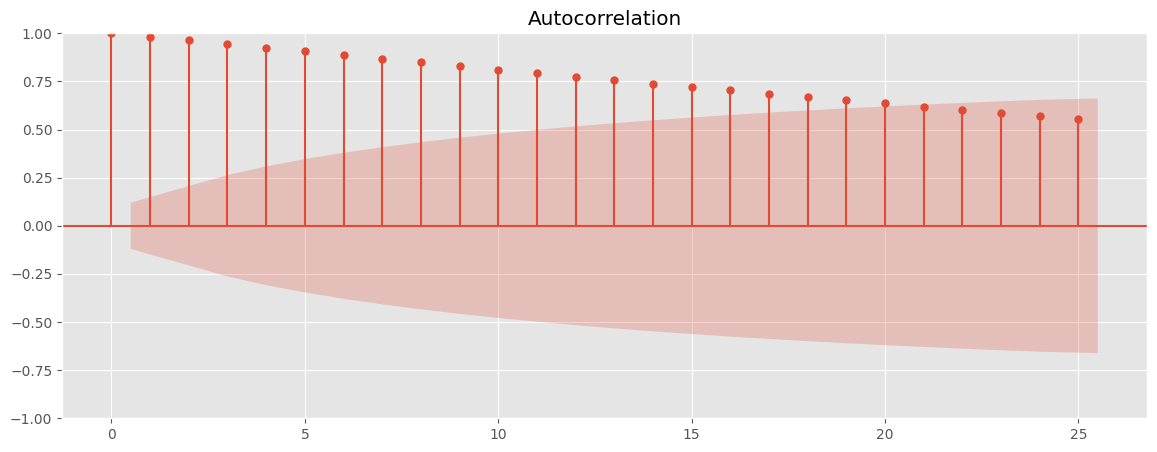

In [58]:
#ACF plot of logged 80449 series
plt.figure(figsize=(12,5))
plot_acf(np.log(series80449));

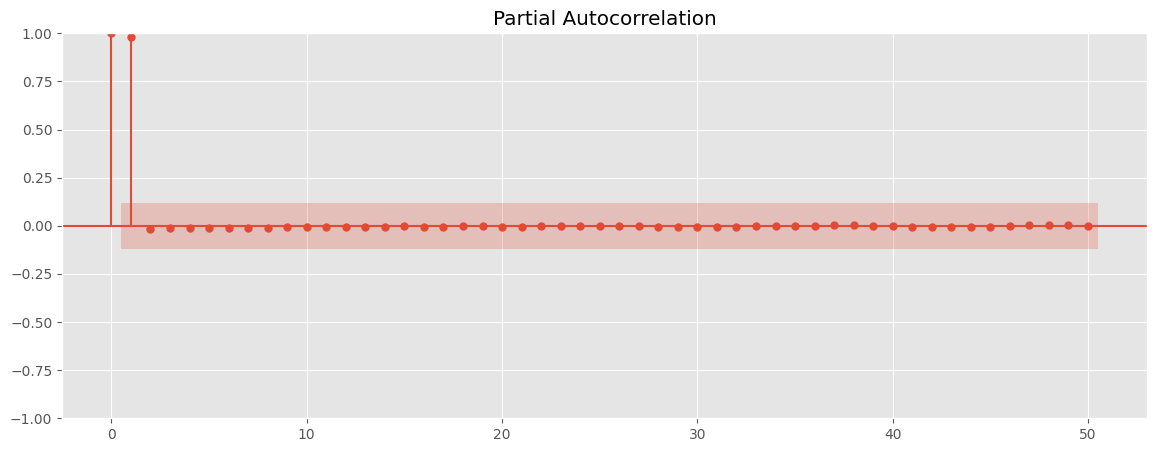

In [59]:
#PACF plot of logged 80449 series
rcParams['figure.figsize'] = 14, 5

plot_pacf(np.log(series80449), lags=50);

Now with a stationary version of the 80449 data series, both plots seem similar to before. For the ACF plot there is a tail off pattern and there are several autocorrelations that are significantly non zero. Therefore the time series is non random. The PACF plot shows geometric decay. As a result, a MA(20) model would be appropriate for this data series. 

## Residuals of Data Series ACF & PACF Plots

<Figure size 1200x500 with 0 Axes>

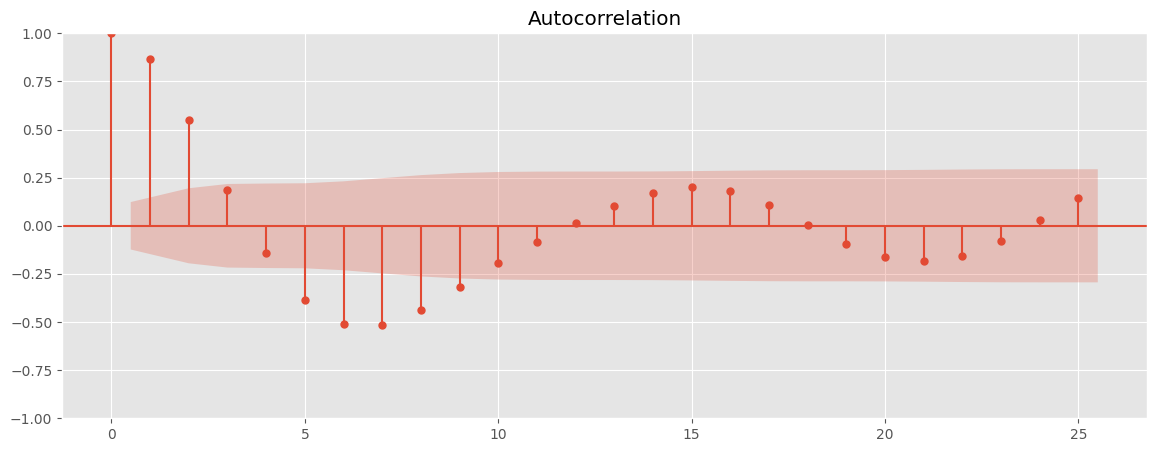

In [60]:
#ACF plot of residuals 80449 series
plt.figure(figsize=(12,5))
plot_acf(series80449_residuals);

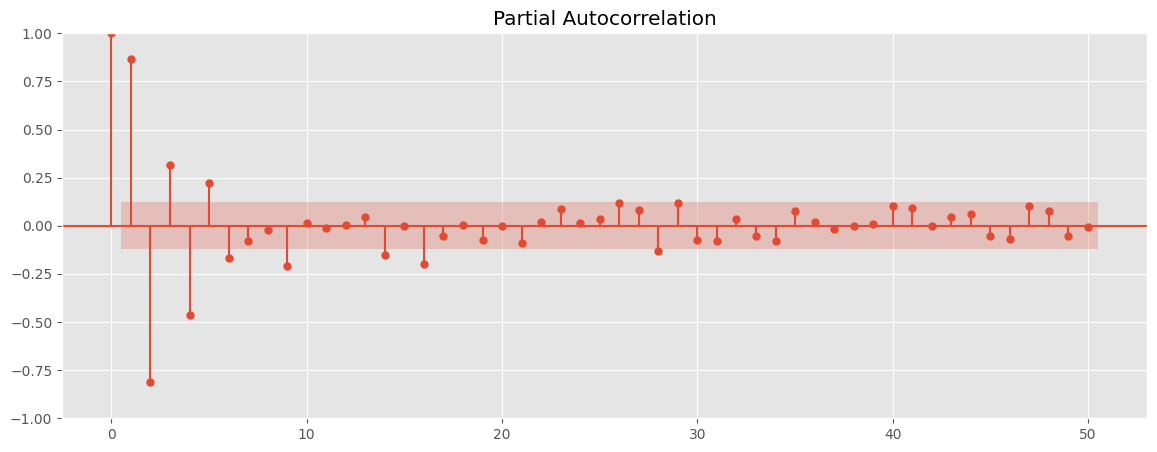

In [61]:
#PACF plot of residuals 80449 series
rcParams['figure.figsize'] = 14, 5

plot_pacf(series80449_residuals, lags=50);

In contrast to before, the PACF & ACF plots of the residuals of the data series look very different. There are several auotcorrelations that are significantly non zero. Therefore the time series is non random. There is a high degree of correlation between adjacent and near adjacent observations in PACF plot. Therefore a AR(3) would be an appropriate model. 

# Model Building

In order to determine which time series model is appropriate for the data series, four models will be built. Once built, the most accurate time series model will be selected to fine tune and make predictions for final recommendations. The RMSE score will be used as a determinate of which model is the most accurate. The reason the RMSE will be used is that, as an expression of how closely the data points are around the line of best fit, the highest RMSE score shows the most accurate prediction and limits the amount of unpredicted values. This is important since the client wants to as accurately as possible predict future ROI on investment. 

## Splitting the Data into Train and Test

In order to evaluate the accuracy of the predictions generated by the models, a train test split will be utilized. Because chronological order matters, a portion of the data series will be cut off at the end, and reserved as the test set. For Time Series Data it is better that the split is more weighted towards the train data because of interdependence. Therefore a split of 80% train and 20% test will be utilized. 

In [62]:
# find the index to split off 20% of the data
cutoff = round(series80449.shape[0]*0.8)
cutoff

212

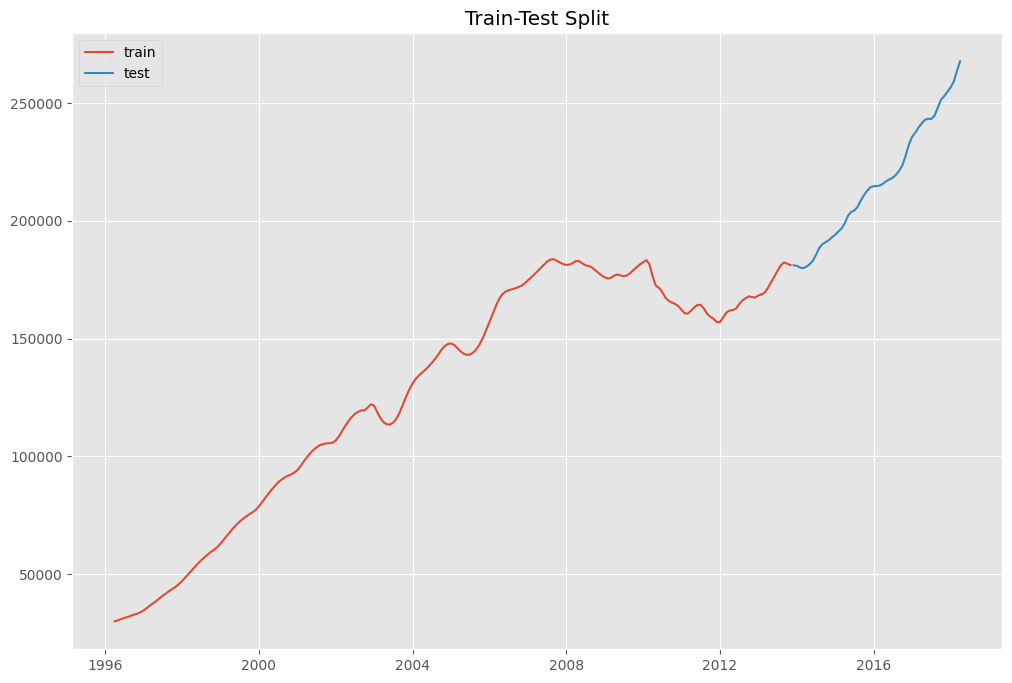

In [63]:
# Define train and test sets according to the index found above
train = series80449[:cutoff]

test = series80449[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [ ]:
split = TimeSeriesSplit()

for train_ind, val_ind in split.split(train):
    print(train_ind, val_ind)

An important observation about the train test split in the data series is that the extreme event of the 2008 recession is included in the train data series. This extreme outlier event might prove challenging for building and fine tuning models. 

## Establishing A Baseline Naive Model

In order to establish the relative success of additional model, a baseline naive model will be built and evaluated. The original series will be shifted to the future by one month and then used as the prediction for the test data series. 

In [ ]:
# The prediction for the next day is the original series shifted to the future by one month.
naive = train.shift(1)
naive

In [ ]:
#plot of the one month shift 
fig, ax = plt.subplots()

train[30:].plot(ax=ax, c='r', label='original')
naive[30:].plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

In order to compare the baseline to later models, the RMSE will be calculated.

In [ ]:
#Isolating next month prediction
naive_pred = naive.iloc[-1]
print(naive_pred)

In [ ]:
#Creating new prediction dataset with shifted prediction
naive_df = test.copy()
naive_df['value'] = naive_pred['value']

In [ ]:
#Plotting naive baseline prediction against test data series
fig, ax = plt.subplots()

test.plot(ax=ax, c='r', label='original')
naive_df.plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

In [ ]:
#calculating base RMSE
base_rmse = np.sqrt(mean_squared_error(test, naive_df))
print(base_rmse)

All subsequent models will be evaluated against this base RMSE. 

# AUTO ARIMA MODEL

Auto ARIMA is a popular forecasting model used in time series analysis. It is an algorithm that automatically selects the optimal parameters for an ARIMA model based on the provided dataset, making it a powerful tool for time series modeling.

The ARIMA model combines three components: autoregressive (AR), differencing (I), and moving average (MA). The AR component captures the linear relationship between an observation and a lagged version of itself, while the MA component considers the linear relationship between an observation and the residual errors from a moving average model applied to lagged observations. The differencing component helps to stabilize and stationarize the time series data.

By using Auto ARIMA for the 80449 data series, it will eliminates the need for manual trial and error in selecting optimal parameters, saving time and effort. It also provides a systematic and objective approach to model selection, improving the accuracy of forecast and handles seasonality in the data.


## Fitting an AUTO-ARIMA Model on our Training Series


For time series modeling a stationary dataset is usually required to create an accurate prediction model. However, by utilizing an AUTO-ARIMA model, the model itself will generate the optimal values to eliminate stationarity and create predictions. As a result the AUTO-ARIMA model will be built using the original data series from the 80449 zipcode. 

In [ ]:
# Creating and Fitting an AUTO ARIMA model to the train dataset
import pmdarima as pm

auto_model = pm.auto_arima(train,
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True)



print(auto_model.summary())

The auto arima model has run through several different parameters in order to pick the order values and season order values that minimize the AIC value of the model for the data series. These values will be extracted from the AUTO ARIMA and then used to train a SARIMAX model for predictions and RMSE evaluation. 

In [ ]:
#Identifying the order values for the model
auto_model.order

In [ ]:
#Identifying the Seasonal Order values for the model
auto_model.seasonal_order

## Using Optimal Parameters to Build a SARIMAX Model

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(train, 
                                        order=(4,2,4), 
                                        seasonal_order=(0, 0, 0, 0), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])
auto_model.plot_diagnostics(figsize=(18,18))
plt.show()

It is important to confirm that the residuals are not correlated and that they are normally distributed. Otherwise, additional changes will need to be made to the model. 

Checking each of the diagnostic plots:

- In the plot on the top right, the KDE line somewhat closely follows along the N(0,1) line which is the standard notation for a normal distribution having a mean of 0 and a standard deviation of 1. As a result, this can be interpreted to mean that the residuals are normally distributed. 

- The qq-plot shown on the bottom left displays that the residuals follow the linear trend line. As a result, it can also be interpreted to mean that the residuals are normally distributed. 

- From the Correlogram plot on the bottom left, it can be seen that the time series residuals displace low correlation with their lagged versions. This becomes clearer as the time series continues further along. This seems to indicate that there isn't any obvious seasonality in our series. 

Based on these observations, it can be confidently concluded that the model does not have correlations and that it satisfactorily fits the data to forecast future prices. 

In [ ]:
output.summary()

## Evaluating the SARIMAX Model Performance

In order to test the accuracy of the model, the predictions for the period between May 2013 and April 2018 will be retrieved. The predictions will be plotted on the same chart to provide a visualization of how far and/or close the predictions are to the test values. Then RMSE will be used to evaluate the model's performance compared to the baseline. 

In [ ]:
# Getting predictions starting from 12-2013 and calculating confidence intervals
pred_arima = output.get_prediction(start=pd.to_datetime('2013-12'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf_arima = pred_arima.conf_int()

In [ ]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = series80449.plot(label='observed')

# Plot predicted values
pred_arima.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf_arima.index,
                pred_conf_arima.iloc[:, 0],
                pred_conf_arima.iloc[:, 1], color='lightpink', alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_title('Testing Forecasting AUTO-ARIMA Model Performance',fontsize=30)
plt.legend()

plt.show()

In [ ]:
# Get the real and predicted values
price_forecasted = pred_arima.predicted_mean
price_truth = series80449['2013-12-01':]

# Compute the RMSE for the SARIMAX model performance
arima_rmse = np.sqrt(mean_squared_error(price_forecasted, price_truth))
print(arima_rmse)

In [ ]:
print(f"The RMSE value associated with the AUTO ARIMA model is {arima_rmse}.")
if arima_rmse < base_rmse:
    print("Based on RMSE value the AUTO ARIMA model has outperformed the Baseline Model")
else:
    print(f"Based on RMSE value the AUTO ARIMA model has been outperformed by the Baseline Model with a RMSE of {base_rmse}")

The SARIMAX tuned with the AUTO ARIMA has outperformed the baseline RMSE score. However, an RMSE score of 31,204 dollars is significant when all properties are under 300,000 dollars. It seems that the extreme event might be having an outsized effect on the predictions of the model and causing the predictions to underestimate the test values. A more sophisticaed model may be needed to compensate for this extreme outlier event. 

# Facebook Prophet Model

Facebook Prophet is a time series forecasting model developed by Facebook's Core Data Science team. It is designed to provide accurate predictions for univariate time series data, which consists of observations recorded at regular intervals over time. The model is particularly useful for forecasting tasks where historical patterns and seasonality play a significant role. For the 80449 data series, it's ability to accomodate a wide range of real world scenarios will hopefully make it successful in accounting for the extreme events. 

## Fitting Facebook Prophet Model on the Training Series¶

Facebook Prophet Model requires the data series to be formatted in a specific way for the model to process. Facebook Prophet model also assumes stationarity in the data series, so this pre-processing will need to be implemented as well. 

In [ ]:
#Examining the format of the train data series
train

In [ ]:
#Taking the log of the 80449 data series for stationarity
fb_train = pd.Series(np.log(train['value']), index=train.index)
fb_train = fb_train.reset_index()

In [ ]:
#examining transformed data series
fb_train

In [ ]:
#Formatting column names for Facebook Prophet Model
fb_train = fb_train.rename(columns={'value': 'y', 'time': 'ds'})
fb_train.head(5)

In [ ]:
#Building and Fitting Facebook Prophet Model on train data series
FB_Model = Prophet()

FB_Model.fit(fb_train)

In [ ]:
#Creating a df with the dates for predictions
fb_future_dates = FB_Model.make_future_dataframe(periods=53, freq='MS')
fb_future_dates.tail()

In [ ]:
#Filling in df with predictions from FB Prophet Model
fb_forecast = FB_Model.predict(fb_future_dates)
fb_forecast.head()

In [ ]:
#Isolating columns with relevant info for evaluation
fb_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
#Visualization of predicted values and uncertainty intervals
FB_Model.plot(fb_forecast)
plt.show();

In [ ]:
#Plotting Model Components
FB_Model.plot_components(fb_forecast)
plt.show();

From the visualizations, it can be seen that the trend of the data series is leading to a level prediction. This is unlikely to be a very accurate prediction since in the test data there is a continuation of linear growth after the steep increase and decrease of the recession. The seasonality shows some interesting fluctuations in the beginning of the year that seems to stablize as the year continues. 

## Evaluating the Facebook Prophet Model

As has been done previously with the baseline and the SARMIX model, RMSE will be used to evaluate the success of the Facebook Prophet model. 

In [ ]:
#examining the FB forecast df
fb_forecast[212:]

In [ ]:
# Getting the real and predicted values
fb_prediction = fb_forecast[212:]
fb_prediction = fb_prediction[['yhat','ds']]
fb_prediction['unlog_value'] = np.exp(fb_prediction['yhat'])

In [ ]:
# Compute the mean square error
fb_rmse = np.sqrt(mean_squared_error(test['value'], fb_prediction['unlog_value']))
print(fb_rmse)

In [ ]:
print(f"The RMSE value associated with the base model is {base_rmse}.")
print(f"The RMSE value associated with the AUTO ARIMA model is {arima_rmse}.")
print(f"The RMSE value associated with the Facebook Prophet model is {fb_rmse}.")

According the RMSE evaluation, the Facebook Prophet is performing even more poorly then the baseline model. In order to try improving the performance of the Facebook prophet, tuning certain aspects of the Facebook model will be implemented. 

## Tuning the Facebook Prophet Model

It can be seen from the large RMSE score that there is huge gap in prediction and the true values of the test data series. Therefore it is needed to optimize the Facebook Prophet model by adding other parameters like holidays, changepoints etc.

## Importing Holidays into the Facebook Model

The Facebook Prophet model allows holidays to be included in the modeling forecast in order to take the effect of holidays into account. In order to try increasing accuracy of predictions, holidays will be incorporated into the new tuned Facebook Prophet Model. 

In [ ]:
#List of years included in the data series
year_list = [1996, 1997,1998,1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
            2013, 2014, 2015, 2016, 2017, 2018]

In [ ]:
#creating a df of holidays for each year
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=year_list).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [ ]:
#examining the df of holidays
holiday.head()

In [ ]:
#Building FB Prophet model with holidays
fb_model_with_holidays = Prophet(holidays=holiday)
fb_model_with_holidays.fit(fb_train)

In [ ]:
#Forecasting predictions with holidays
future_with_holidays = fb_model_with_holidays.make_future_dataframe(periods=57, freq='D')
forecast_with_holidays = fb_model_with_holidays.predict(future_with_holidays)
forecast_with_holidays[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = fb_model_with_holidays.plot(forecast_with_holidays,ax=ax)
plt.show()

In [ ]:
# Plot the components of the model
fig = fb_model_with_holidays.plot_components(forecast_with_holidays)

In [ ]:
#Filling in df with predictions from FB Prophet Model with Holidays
fb_forecast_holiday = fb_model_with_holidays.predict(fb_future_dates)
fb_forecast_holiday.head()

In [ ]:
# Getting the real and predicted values
fb_prediction_holiday = fb_forecast_holiday[212:]
fb_prediction_holiday = fb_prediction_holiday[['yhat','ds']]
fb_prediction_holiday['unlog_value'] = np.exp(fb_prediction_holiday['yhat'])

In [ ]:
fb_holiday_rmse = np.sqrt(mean_squared_error(test['value'], fb_prediction_holiday['unlog_value']))
print(fb_holiday_rmse)

There was actually an increase in RMSE value after this addition of holidays into the Facebook Prophet Model. Since this tuning was ineffective in increasing the performance of the Facebook Prophet Model, additional parameters to be tuned will be explored. 

## Parameter Tuning for the Facebook Prophet Model

In order to most effectively determine the ideal parameters for the Facebook Prophet Model, grid search will be utilized. 

In [ ]:
#Creating param_grid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

In [ ]:
#Training FB Model with param grid to minimize RMSE value
strt='2019-12-31'
end='2020-02-26'
model_parameters = pd.DataFrame(columns = ['RMSE','Parameters'])
for p in grid:
    tune_test = pd.DataFrame()
    print(p)
    random.seed(0)
    tune_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday, 
                         interval_width=0.95)
    tune_model.add_country_holidays(country_name='US')
    tune_model.fit(fb_train)
    tune_forecast = tune_model.make_future_dataframe(periods=53, freq='M',include_history = False)
    tune_forecast = tune_model.predict(tune_forecast)
    tune_test=tune_forecast[['ds','yhat']]
    #Actual = test[(fb_test['ds']>strt) & (fb_test['ds']<=end)]
    tune_test['unlog_value'] = np.exp(tune_test['yhat'])
    RMSE = np.sqrt(mean_squared_error(test['value'], tune_test['unlog_value']))
    print('Root Mean Square Error(RMSE)------------------------------------',RMSE)
    model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)

In [ ]:
#create df with model parameters sorted by RMSE
parameters = model_parameters.sort_values(by=['RMSE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

In [ ]:
#pull out best parameters from df
parameters['Parameters'][0]

In [ ]:
# Setup and train model with holidays
fb_final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.1,
                      holidays_prior_scale = 0.1,
                      n_changepoints = 100,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
fb_final_model.add_country_holidays(country_name='US')
fb_final_model.fit(fb_train)

In [ ]:
#Final FB Model predictions
fb_final_future = fb_final_model.make_future_dataframe(periods=53, freq='M')
fb_final_forecast = fb_final_model.predict(fb_final_future)
fb_final_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [ ]:
# Plot the components of the model
fig = fb_final_model.plot_components(fb_final_forecast)

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = fb_final_model.plot(fb_final_forecast,ax=ax)
plt.show()


In [ ]:
# Getting the real and predicted values
fb_prediction_final = fb_final_forecast[212:]
fb_prediction_final = fb_prediction_final[['yhat','ds']]
fb_prediction_final['unlog_value'] = np.exp(fb_prediction_final['yhat'])

In [ ]:
#calculating the final FB model rmse
fb_final_rmse = np.sqrt(mean_squared_error(test['value'], fb_prediction_final['unlog_value']))
print(fb_final_rmse)

In [ ]:
print(f"The RMSE value associated with the base model is {base_rmse}.")
print(f"The RMSE value associated with the AUTO ARIMA model is {arima_rmse}.")
print(f"The RMSE value associated with the Facebook Prophet model is {fb_rmse}.")
print(f"The RMSE value associated with the Tuned Facebook Prophet model is {fb_final_rmse}.")

Tuning the parameter of the Facebook Prophet model had a positive impact on the original untuned FB Prophet model. However, the AUTO ARIMA Sarimax model is still the most successful RMSE score. There is one additional model that will be used to try and improve performance. 

# LSTM Neural Network Model

A Long Short-Term Memory (LSTM) neural network model is a type of recurrent neural network (RNN) that is designed to capture long-term dependencies and patterns in sequential data, making it particularly useful for time series modeling. In the context of time series modeling, LSTM models excel at capturing temporal dependencies and patterns in the data. They can effectively model and predict sequences with complex patterns, such as stock prices, weather patterns, speech recognition, and natural language processing tasks. It is the hope that the LSTM model will do a better job not overfitting to the train dataset and negatively impacting the accuracy of it's predictions compared to the test dataset. 

## Preprocesing 80449 Data Series for LSTM Modeling

Since Flatiron program materials did not include information about how to model a time series with a LSTM Nueral Network, outside references were required. In order to properly preproces, build, and train an LSTM model with time series data, the information found in Dr. Jason Brownlee's article entitled 'Time Series Forecasting with the Long-Term Memory Network in Python' was extremely helpful. LINK HERE Many of the functions from that article are utilized in this section. 

## Transform Time Series to Supervised Learning

LSTM Nueral Networks assumes that the data is divided into input (X) and output (y) components. Therefore for a time series problem this can be acheived by using the observation from the last time step as the input and the observation at the current time step as the output. 

In [ ]:
#observing the original 80449 data series
series80449

In [ ]:
# function to frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
 df = DataFrame(data)
 columns = [df.shift(i) for i in range(1, lag+1)]
 columns.append(df)
 df = concat(columns, axis=1)
 df.fillna(0, inplace=True)
 return df

In [ ]:
# transform to supervised learning
X = series80449.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

## Transform Time Series to Stationary

Stationary data is easier to model and will very likely result in more skillful forecasts. Therefore taking the log of the data series will be used to establish stationarity in the data. 

In [ ]:
#Taking the log of the time series
supervised_logged = np.log(supervised)
supervised_logged

In [ ]:
#replacing inf with 0
supervised_logged.replace([np.inf, -np.inf], 0, inplace=True)

## Transform Time Series to Scale

Like other neural networks, LSTMs expect data to be within the scale of the activation function used by the network. The default activation function for LSTMs is the hyperbolic tangent, which outputs values between -1 and 1. This is the preferred range for the time series data. The scaling coefficients values must be calculated on the training dataset and applied to scale the test dataset and any forecasts. This is to avoid contaminating the experiment with knowledge from the test dataset, which might give the model a small edge.

In [ ]:
# Define train and test sets according to the index found above
train_sup = supervised_logged[:cutoff]

test_sup = supervised_logged[cutoff:]

In [ ]:
#transforming training data series to a numpy array
train_sup = train_sup.to_numpy()

In [ ]:
#transfomring testing data series to a numpy array
test_sup = test_sup.to_numpy()

In [ ]:
# function to scale train and test data to [-1, 1]
def scale(train, test):
 # fit scaler
 scaler = MinMaxScaler(feature_range=(-1, 1))
 scaler = scaler.fit(train)
 # transform train
 train = train.reshape(train.shape[0], train.shape[1])
 train_scaled = scaler.transform(train)
 # transform test
 test = test.reshape(test.shape[0], test.shape[1])
 test_scaled = scaler.transform(test)
 return scaler, train_scaled, test_scaled

In [ ]:
# inverse scaling for a forecasted value for predictions
def invert_scale(scaler, X, value):
 new_row = [x for x in X] + [value]
 array = np.array(new_row)
 array = array.reshape(1, len(array))
 inverted = scaler.inverse_transform(array)
 return inverted[0, -1]

In [ ]:
# transform the scale of the test and train data
scaler, train_scaled, test_scaled = scale(train_sup, test_sup)

In [ ]:
#reshape for model input
X, y = train_scaled[:, 0:-1], train_scaled[:, -1]
X = X.reshape(X.shape[0], 1, X.shape[1])

## LSTM Model Development

Now that the data series has been pre-processd to be effectively used in the LSTM model, it is time to build the model itself. For processing time, a simple LSTM will be constructed with only one hidden LSTM layer.

In [ ]:
#Building LSTM Model with one hidden LSTM Layer
lstm_model = Sequential()
lstm_model.add(LSTM(4, batch_input_shape=(1, X.shape[1], X.shape[2]), stateful=True))
lstm_model.add(Dense(1))
#Using MSE since it closely matches RMSE
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X, y, epochs=100, batch_size=1, verbose=2)

## Evaluating the LSTM Model

Now that the LSTM Nueral Network Model has been built and fitted to the train data it is time to evaluate the predictions against the test data series using RMSE to evaluate the accuracy of its predictions.

In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
 X = X.reshape(1, 1, len(X))
 yhat = model.predict(X, batch_size=batch_size)
 return yhat[0,0]

In [ ]:
#values from the original 80449 data series
raw_values = series80449.values
raw_values.shape

In [ ]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
 # make one-step forecast
 X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
 yhat = forecast_lstm(lstm_model, 1, X)
 # invert scaling
 yhat = invert_scale(scaler, X, yhat)
 yhat = np.exp(yhat)
 # store forecast
 predictions.append(yhat)
 expected = raw_values[len(train) + i ]
 print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

In [ ]:
# visualization of report performance
lstm_rmse = np.sqrt(mean_squared_error(raw_values[-53:], predictions))
print('Test RMSE: %.3f' % lstm_rmse)
# line plot of observed vs predicted
plt.plot(raw_values[-53:])
plt.plot(predictions)
plt.show()

In [ ]:
print(f"The RMSE value associated with the base model is {base_rmse}.")
print(f"The RMSE value associated with the AUTO ARIMA model is {arima_rmse}.")
print(f"The RMSE value associated with the Facebook Prophet model is {fb_rmse}.")
print(f"The RMSE value associated with the Tuned Facebook Prophet model is {fb_final_rmse}.")
print(f'The RMSE value associated with the LSTM Neural Network model is {lstm_rmse}.')

Compared to the RMSE values of previous models, the LSTM Nueral Network vastly improved upon the accuracy of previous predictions. Since the LSTM is a recurrent neural network, having feedback connections versus a standard feedforward neural network had a big impact on accuracy of prediction. Based on this RMSE evaluation, the LSTM Nueral Network model will the be the final model used for prediction on all of the top 25 zipcodes. 

# Forecasting the Future of 80449 Data Series


In [ ]:
# Plug the parameter values from our Auto ARIMA model into a new SARIMAX model that fits the entire series.
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(recent_series, 
                                        order=(1,0,2), 
                                        seasonal_order=(0, 0, 0, 0), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [ ]:
## Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['value'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction'] 
future_prediction

In [ ]:
#Plotting our Forecast

fig, ax = plt.subplots()
recent_series.plot(ax=ax,label='Real Values')


future_prediction['prediction'].plot(ax=ax,label='predicted value',ls='--')

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'], 
                y2= future_prediction['upper'],color='lightpink',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("Average Price")
plt.title('Average Home Price - 33602 - With Forcasted Value & Confidence Intervals')
plt.show()


# Forecasting on All Top 25 Zip Codes in Clients Budget


In [ ]:
zip_predictions = {}
top_25_for_modeling = top_25_modeling_df.drop(columns='roi_since11')

for zipcode in top_25_for_modeling['RegionName']:

    series = melt_data(top_25_for_modeling[top_25_for_modeling['RegionName']==zipcode])
   
    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]
    
    #Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]
    
    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series, start_p=0, start_q=0,
                     test='adf',
                     max_p=5, max_q=5,
                     m=1,
                     d=0,
                     seasonal = True,
                     start_P=0,start_Q=0,
                     D=0,
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)
   
    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(recent_series, 
                                            order= auto_model.order, 
                                            seasonal_order= auto_model.seasonal_order, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['value'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction'] 
    
    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[zipcode] = ((prediction['prediction'][-1])
                                - (series['value'][-1]))/ (series['value'][-1])

In [ ]:
# Sorting our 3 year ROI forecast for zipcodes into descending order
sort_orders = sorted(zip_predictions.items(), key=lambda x: x[1], reverse=True)

sorted_forecast_3yr = {}
for i in sort_orders:
	sorted_forecast_3yr[i[0]] = i[1]

#Selecting only the Top 5 Zips
top_5_zipcodes = list(sorted_forecast_3yr.items())[:5]

fig, ax = plt.subplots(figsize=(18,12))

x_labels = [top_5_zipcodes[0][0],top_5_zipcodes[1][0],top_5_zipcodes[2][0],
            top_5_zipcodes[3][0],top_5_zipcodes[4][0]]
x = [1,2,3,4,5]
y = [top_5_zipcodes[0][1],top_5_zipcodes[1][1],top_5_zipcodes[2][1],
     top_5_zipcodes[3][1],top_5_zipcodes[4][1]]

ax.bar(x, y, color='mediumslateblue')
remaining_zipcodes = list(sorted_forecast_3yr.items())[5:]
median_ROI_other_zips = remaining_zipcodes[5][1]
ax.axhline(y=median_ROI_other_zips,label = 'Median ROI for remaining Zips')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_yticks([(a/100) for a in list(range(0,75,5))])
ax.set_yticklabels([str(a)+'%' for a in list(range(0,75,5))])
ax.set_title('Top 5 Recommendations', fontsize=20)
ax.set_ylabel('Average ROI', fontsize=20)
ax.set_xlabel('Zipcodes',fontsize=20)
ax.legend(prop={'size': 15});

# Conclusion

In [ ]:
print(f'The Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[0][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[0][1])*100,2)}%')
print(f'The Second Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[1][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[1][1])*100,2)}%')
print(f'The Third Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[2][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[2][1])*100,2)}%')
print(f'The Fourth Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[3][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[3][1])*100,2)}%')
print(f'The Fifth Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[4][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[4][1])*100,2)}%')

In [ ]:
recommended_zips = pd.DataFrame([a for a in sorted_forecast_3yr.keys()][:5])
recommended_zips.columns = ['RegionName']
final_zips_map = pd.merge(recommended_zips, zip_long_lat, how="left", on=["RegionName"])
print(final_zips_map)

In [ ]:
geometry = [Point(xy) for xy in zip(final_zips_map['Longitude'], final_zips_map['Latitude'])] #create Points
geo_df = gpd.GeoDataFrame(final_zips_map, 
                          crs = crs, 
                          geometry = geometry) #define the geometry df

#plot the data
fig, ax = plt.subplots(figsize = (10,10))
us49.to_crs(epsg=4326).plot(ax=ax)
sns.scatterplot(x="Longitude", y="Latitude",data=final_zips_map, ax=ax)
ax.set_title('Distribution of Top 5 Most Profitable Zip Codes');